In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:ylabel='Outcome'>

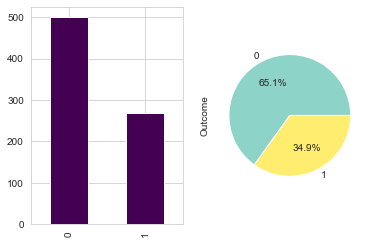

In [14]:
fig,ax = plt.subplots(1,2)
df['Outcome'].value_counts().plot(kind='bar',cmap='viridis',ax=ax[0])
df['Outcome'].value_counts().plot(kind='pie',autopct='%.1f%%',cmap='Set3',ax=ax[1])

<AxesSubplot:xlabel='Age', ylabel='Density'>

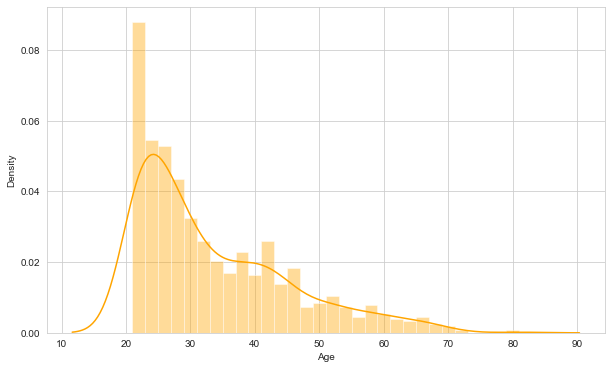

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'],color='orange',bins=30)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

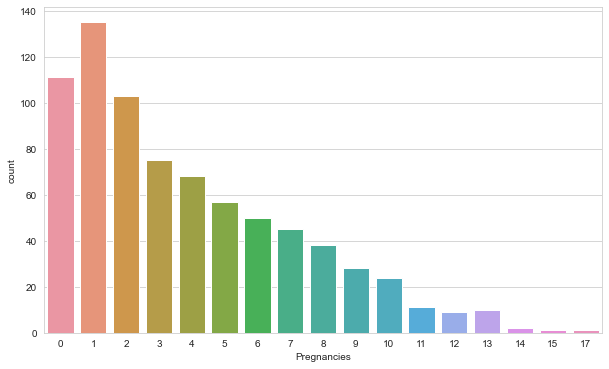

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pregnancies',data=df)

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

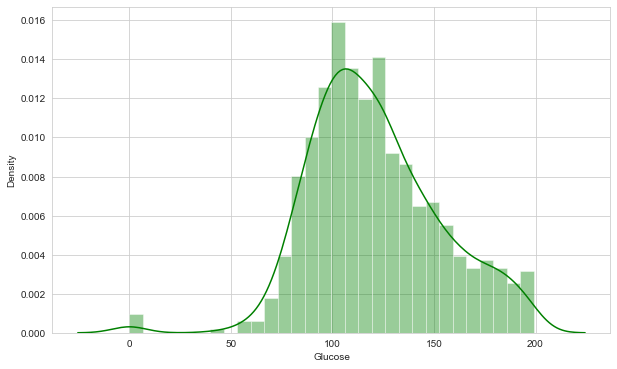

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df['Glucose'],color='green',bins=30)

<AxesSubplot:>

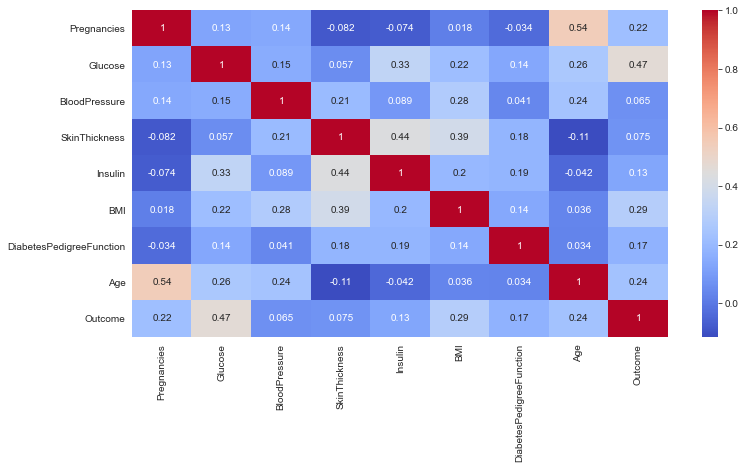

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

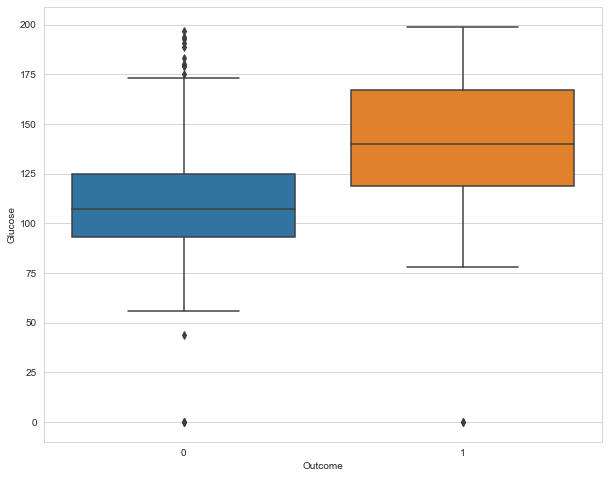

In [22]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outcome',y='Glucose',data=df)

In [55]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Accuary of Logistic Regression: 78.57142857142857


Confusion Matrix of Logistic Regression:


Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        97
           1       0.80      0.56      0.66        57

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



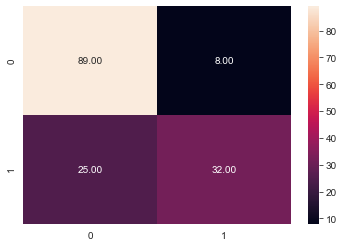

In [56]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

print("Accuary of Logistic Regression: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Logistic Regression:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Logistic Regression:")
print(classification_report(y_test,predictions))

acc_lg = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Support Vector Machine: 80.51948051948052


Confusion Matrix of Support Vector Machine:


Classification Report of Support Vector Machine:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        97
           1       0.83      0.60      0.69        57

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154



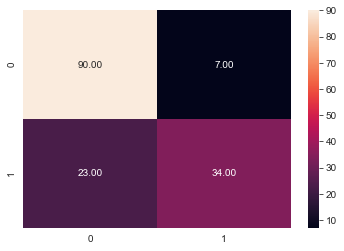

In [57]:
svc = SVC()
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

print("Accuary of Support Vector Machine: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Support Vector Machine:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Support Vector Machine:")
print(classification_report(y_test,predictions))

acc_lg = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Random Forest: 81.16883116883116


Confusion Matrix of Random Forest:


Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        97
           1       0.87      0.58      0.69        57

    accuracy                           0.81       154
   macro avg       0.83      0.76      0.78       154
weighted avg       0.82      0.81      0.80       154



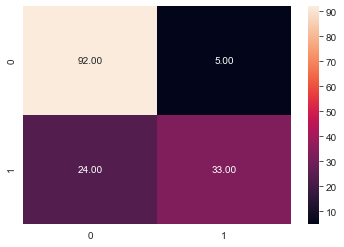

In [58]:
rf = RandomForestClassifier(n_estimators=160)
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

print("Accuary of Random Forest: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Random Forest:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Random Forest:")
print(classification_report(y_test,predictions))

acc_rf = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of K Nearest Neighbors: 74.02597402597402




Classification Report of K Nearest Neigbors:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        97
           1       0.67      0.58      0.62        57

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



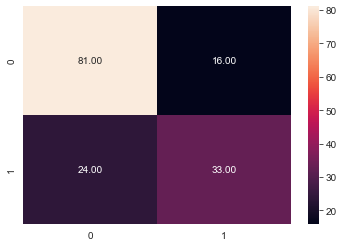

In [59]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print("Accuary of K Nearest Neighbors: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of K Nearest Neigbors:")
print(classification_report(y_test,predictions))

acc_knn = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Decision Tree: 72.72727272727273


Confusion Matrix of Decision Tree:


Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        97
           1       0.67      0.53      0.59        57

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154



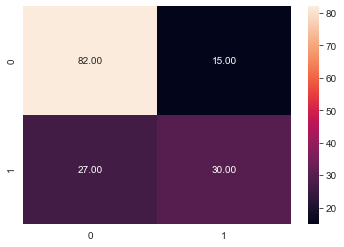

In [60]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)

print("Accuary of Decision Tree: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Decision Tree:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Decision Tree:")
print(classification_report(y_test,predictions))

acc_dt = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Gradient Boosting: 83.11688311688312


Confusion Matrix of Gradient Boosting:


Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        97
           1       0.84      0.67      0.75        57

    accuracy                           0.83       154
   macro avg       0.84      0.80      0.81       154
weighted avg       0.83      0.83      0.83       154



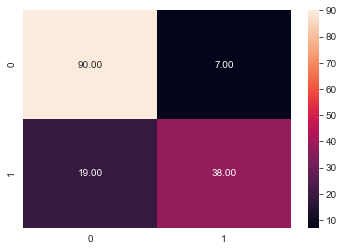

In [61]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
predictions = gb.predict(X_test)

print("Accuary of Gradient Boosting: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Gradient Boosting:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Gradient Boosting:")
print(classification_report(y_test,predictions))

acc_gb = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Ada Boosting: 79.87012987012987


Confusion Matrix of Ada Boosting:


Classification Report of Ada Boosting:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        97
           1       0.80      0.61      0.69        57

    accuracy                           0.80       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



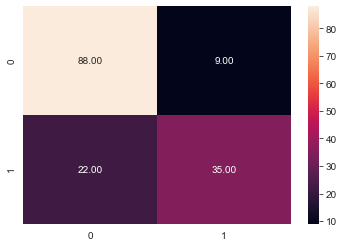

In [62]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predictions = ab.predict(X_test)

print("Accuary of Ada Boosting: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Ada Boosting:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Ada Boosting:")
print(classification_report(y_test,predictions))

acc_ab = round(accuracy_score(y_test, predictions) * 100, 2)

In [ ]:
models = pd.DataFrame({
    'model': ['Logistic Regression', 'Support Vector Machine','Random Forest', 
              'KNN','Decision Tree','ANN','Gradient Boosting','Ada Boost'],
    'score': [acc_lg, acc_svc, acc_rf, 
              acc_knn, acc_dt, acc_ann,
              acc_gb,acc_ab]
})

models

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='score', y='model', data=models)
plt.title('Model Comparisons')